# 13wk-50: 아이스크림(이상치) / 자료분석(Autogluon)

최규빈  
2023-12-01

# 1. 강의영상

<https://youtu.be/playlist?list=PLQqh36zP38-z2-S-MmANJvtOOfd7LMcTF&si=SJ-QPCnXqnz8OwZe>

# 2. Imports

In [1]:
#!pip install autogluon.eda

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
#---#"
from autogluon.tabular import TabularPredictor
import autogluon.eda.auto as auto
#---#
import warnings
warnings.filterwarnings('ignore')

# 3. Data

In [3]:
np.random.seed(43052)
temp = pd.read_csv('https://raw.githubusercontent.com/guebin/DV2022/master/posts/temp.csv').iloc[:100,3].to_numpy()
temp.sort()
ice_sales = 10 + temp * 0.5 + np.random.randn(100)
ice_sales[0] = 50
df_train = pd.DataFrame({'temp':temp,'ice_sales':ice_sales})
df_train

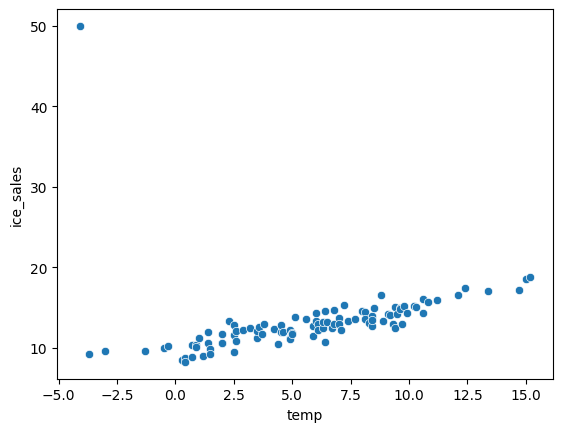

In [4]:
sns.scatterplot(df_train,x='temp',y='ice_sales')

# 4. 적합

In [5]:
# step1 -- pass 
# step2
predictr = TabularPredictor(label='ice_sales')
# step3
predictr.fit(df_train)
# step4
yhat = predictr.predict(df_train)

No path specified. Models will be saved in: "AutogluonModels/ag-20231201_104555/"
Beginning AutoGluon training ...
AutoGluon will save models to "AutogluonModels/ag-20231201_104555/"
AutoGluon Version:  0.8.2
Python Version:     3.10.13
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #26~22.04.1-Ubuntu SMP PREEMPT_DYNAMIC Thu Jul 13 16:27:29 UTC 2
Disk Space Avail:   248.42 GB / 490.57 GB (50.6%)
Train Data Rows:    100
Train Data Columns: 1
Label Column: ice_sales
Preprocessing data ...
AutoGluon infers your prediction problem is: 'regression' (because dtype of label-column == float and many unique label-values observed).
    Label info (max, min, mean, stddev): (50.0, 8.273155164108418, 13.17881, 4.33788)
    If 'regression' is not the correct problem_type, please manually specify the problem_type parameter during predictor init (You may specify problem_type as one of: ['binary', 'multiclass', 'regression'])
Using Feature Generators to preprocess the data ...

[1000]  valid_set's rmse: 1.69432

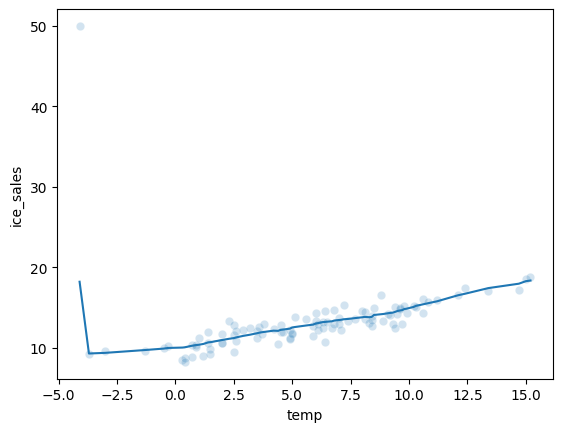

In [8]:
sns.scatterplot(df_train,x='temp',y='ice_sales',alpha=0.2)
sns.lineplot(df_train,x='temp',y=yhat)

# 5. 해석 및 시각화

## A. y의 분포, (X,y)의 관계 시각화

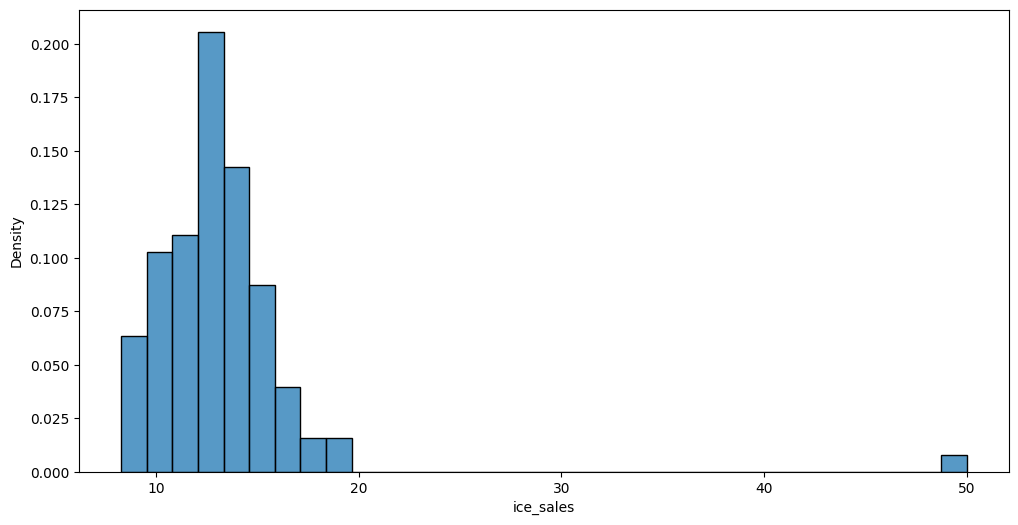

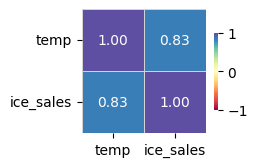

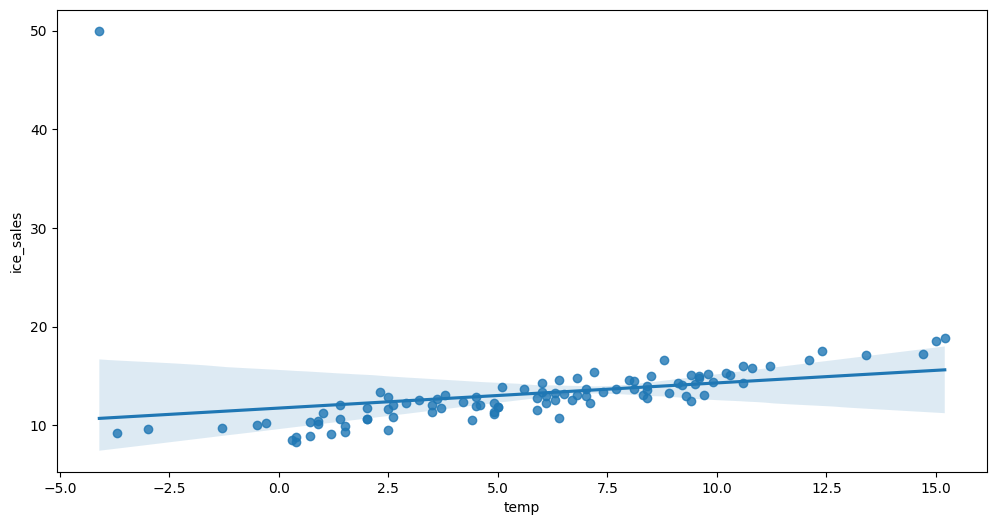

In [9]:
auto.target_analysis(
    train_data=df_train,
    label='ice_sales',
    fit_distributions=False
)

## B. 중요한 설명변수?

In [10]:
pass # 설명변수가 하나라서..

## C. 관측치별 해석

In [11]:
df_train.iloc[[0]]

In [12]:
predictr.predict(df_train.iloc[[0]])

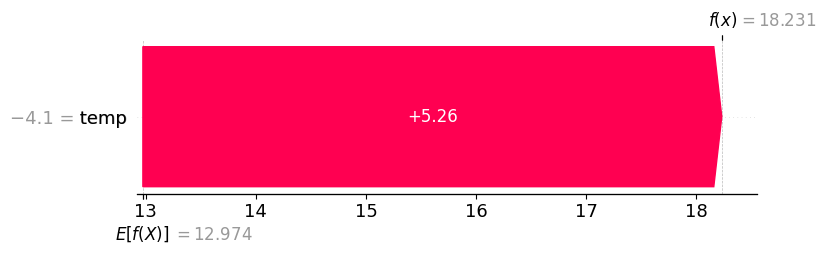

In [17]:
auto.explain_rows(
    train_data=df_train,
    model=predictr,
    rows=df_train.iloc[[0]],
    display_rows= True,
    plot='waterfall'
)
    